<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [29]:
!pip install pandas

In [30]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [31]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2026-02-12 19:36:33--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  45.4MB/s    in 3.4s    

2026-02-12 19:36:37 (45.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [32]:
import pandas as pd
import matplotlib.pyplot as plt


### Load the data


In [33]:
df = pd.read_csv("survey-data.csv")


### Display the first few rows of the data to understand its structure


In [34]:
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



<Figure size 1200x600 with 0 Axes>

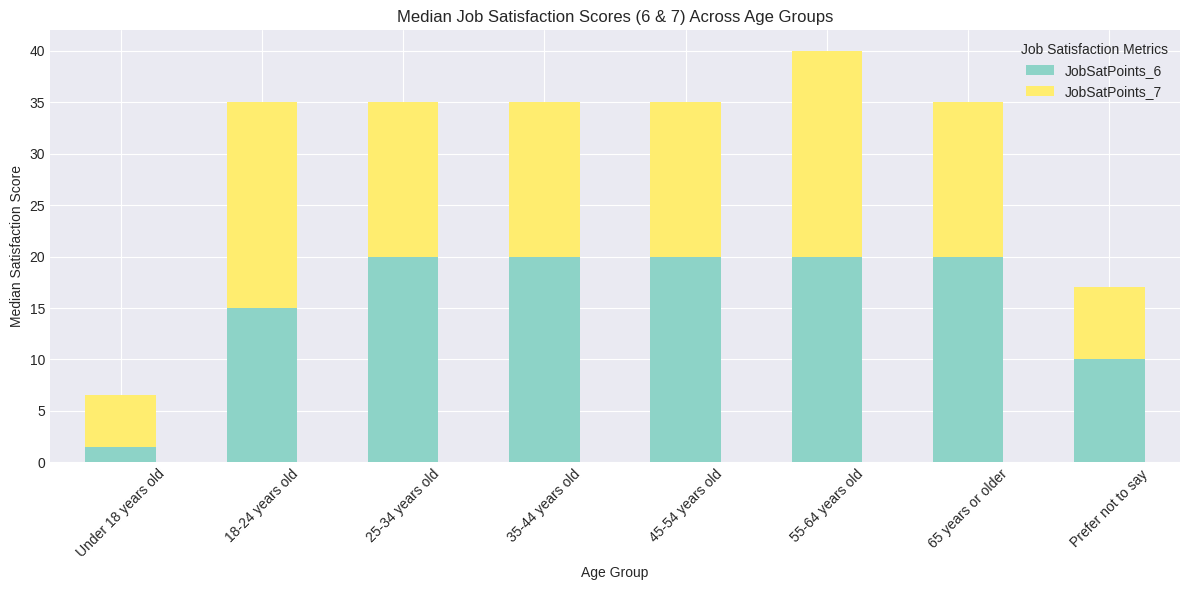

In [35]:
# Step 1: Select relevant columns
cols = ['Age', 'JobSatPoints_6', 'JobSatPoints_7']
job_sat = df[cols].dropna()

# Step 2: Define the desired age order
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

# Step 3: Convert Age column to ordered categorical
job_sat['Age'] = pd.Categorical(job_sat['Age'], categories=age_order, ordered=True)

# Step 4: Group by Age and compute median values
job_sat_grouped = job_sat.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Step 5: Plot stacked bar chart
plt.figure(figsize=(12, 6))

job_sat_grouped.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='Set3'
)

plt.title('Median Job Satisfaction Scores (6 & 7) Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Score')
plt.legend(title='Job Satisfaction Metrics')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


##### `Interpretation Summary`

The stacked chart illustrates how median job satisfaction scores (JobSatPoints_6 and JobSatPoints_7) vary across different age groups. Satisfaction levels generally rise with age, with the **55–64 years old** group showing the highest combined median score. Younger respondents, especially those **under 18**, report noticeably lower satisfaction, suggesting that early‑career individuals may face more uncertainty or less stability in their roles. The older age groups—particularly those in mid‑career and late‑career stages—tend to show stronger satisfaction, possibly reflecting greater experience, job fit, or career stability. The “Prefer not to say” group sits near the middle, indicating no extreme deviation from the overall trend. Overall, the chart highlights a clear pattern: job satisfaction tends to increase as respondents progress through their careers.

In [11]:
# # Step 1: Select relevant columns
# cols = ['Age', 'JobSatPoints_6', 'JobSatPoints_7']
# job_sat = df[cols].dropna()

# # Step 2: Group by Age and compute median values
# job_sat_grouped = job_sat.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# # Step 3: Plot stacked bar chart
# plt.figure(figsize=(12, 6))

# job_sat_grouped.plot(
#     kind='bar',
#     stacked=True,
#     figsize=(12, 6),
#     colormap='Set3'
# )

# plt.title('Median Job Satisfaction Scores (6 & 7) Across Age Groups')
# plt.xlabel('Age Group')
# plt.ylabel('Median Satisfaction Score')
# plt.legend(title='Job Satisfaction Metrics')
# plt.xticks(rotation=45)
# plt.tight_layout()

# plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


<Figure size 1200x600 with 0 Axes>

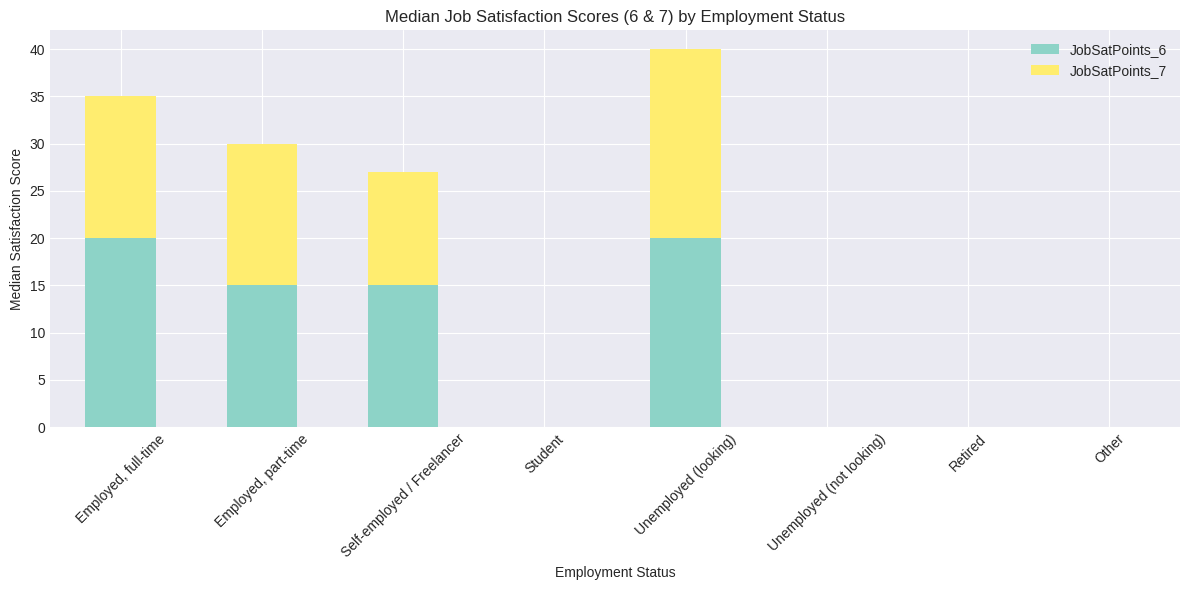

In [36]:
# Step 1: Extract relevant columns
cols = ['Employment', 'JobSatPoints_6', 'JobSatPoints_7']
emp = df[cols].copy()   # do NOT drop rows here

# Step 2: Define a function to recode employment categories
def recode_employment(x):
    if pd.isna(x):
        return 'Other'
    x = x.lower()
    
    if 'employed, full-time' in x:
        return 'Employed, full-time'
    elif 'employed, part-time' in x:
        return 'Employed, part-time'
    elif 'independent contractor' in x or 'freelancer' in x or 'self-employed' in x:
        return 'Self-employed / Freelancer'
    elif 'student' in x:
        return 'Student'
    elif 'not employed, but looking for work' in x:
        return 'Unemployed (looking)'
    elif 'not employed, and not looking for work' in x:
        return 'Unemployed (not looking)'
    elif 'retired' in x:
        return 'Retired'
    else:
        return 'Other'

# Step 3: Apply recoding
emp['EmploymentGroup'] = emp['Employment'].apply(recode_employment)

# Step 4: Group by new categories (median automatically ignores NaN)
emp_grouped = emp.groupby('EmploymentGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Step 5: Sort groups in a logical order
order = [
    'Employed, full-time',
    'Employed, part-time',
    'Self-employed / Freelancer',
    'Student',
    'Unemployed (looking)',
    'Unemployed (not looking)',
    'Retired',
    'Other'
]

emp_grouped = emp_grouped.reindex(order)

# Step 6: Plot stacked bar chart
plt.figure(figsize=(12, 6))

emp_grouped.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='Set3'
)

plt.title('Median Job Satisfaction Scores (6 & 7) by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Median Satisfaction Score')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


#### `Explaining Interpretation`

The stacked chart compares median job satisfaction scores across the major employment groups after recoding the original multi‑select categories. Because the dataset contains many missing values for JobSatPoints_6 and JobSatPoints_7, only some employment groups have enough valid responses to produce visible bars. As a result, categories such as *Student*, *Unemployed (not looking)*, *Retired*, and *Other* appear with no bars, indicating that their satisfaction scores were unavailable or insufficient for calculating a median.

Among the groups with valid data, **Unemployed (looking)** shows the highest combined median satisfaction score. This may reflect optimism or motivation among individuals actively seeking new opportunities. **Employed, full‑time** follows, suggesting that stable employment contributes to higher satisfaction. **Employed, part‑time** and **Self‑employed / Freelancer** show moderate satisfaction levels, which could be influenced by variable schedules, income uncertainty, or differing work environments.

>Overall, the chart highlights how job satisfaction varies across employment types while also revealing the impact of missing data on certain categories. It provides a focused comparison of the groups with sufficient responses and underscores the importance of data completeness when interpreting survey‑based visualizations.

In [31]:
# # Step 1: Extract relevant columns
# cols = ['Employment', 'JobSatPoints_6', 'JobSatPoints_7']
# emp = df[cols].dropna()  # put copy() replacing .dropna() to get all group in the viz

# # Step 2: Define a function to recode employment categories
# def recode_employment(x):
#     x = x.lower()
#     if 'employed, full-time' in x:
#         return 'Employed, full-time'
#     elif 'employed, part-time' in x:
#         return 'Employed, part-time'
#     elif 'independent contractor' in x or 'freelancer' in x or 'self-employed' in x:
#         return 'Self-employed / Freelancer'
#     elif 'student' in x:
#         return 'Student'
#     elif 'not employed, but looking for work' in x:
#         return 'Unemployed (looking)'
#     elif 'not employed, and not looking for work' in x:
#         return 'Unemployed (not looking)'
#     elif 'retired' in x:
#         return 'Retired'
#     else:
#         return 'Other'

# # Step 3: Apply recoding
# emp['EmploymentGroup'] = emp['Employment'].apply(recode_employment)

# # Step 4: Group by new categories
# emp_grouped = emp.groupby('EmploymentGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# # Step 5: Plot stacked bar chart
# plt.figure(figsize=(12, 6))

# emp_grouped.plot(
#     kind='bar',
#     stacked=True,
#     figsize=(12, 6),
#     colormap='Set3'
# )

# plt.title('Median Job Satisfaction Scores (6 & 7) by Employment Status')
# plt.xlabel('Employment Status')
# plt.ylabel('Median Satisfaction Score')
# plt.xticks(rotation=45)
# plt.tight_layout()

# plt.show()


In [14]:
# # Step 1: Select relevant columns
# cols = ['Employment', 'JobSatPoints_6', 'JobSatPoints_7']
# emp_sat = df[cols].dropna()

# # Step 2: Group by Employment Status and compute median values
# emp_sat_grouped = emp_sat.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# # Step 3: Plot stacked bar chart
# plt.figure(figsize=(12, 6))

# emp_sat_grouped.plot(
#     kind='bar',
#     stacked=True,
#     figsize=(12, 6),
#     colormap='Set3'
# )

# plt.title('Median Job Satisfaction Scores (6 & 7) Across Employment Statuses')
# plt.xlabel('Employment Status')
# plt.ylabel('Median Satisfaction Score')
# plt.legend(title='Job Satisfaction Metrics')
# plt.xticks(rotation=45)
# plt.tight_layout()

# plt.show()


In [15]:
# print(df['Employment'].value_counts(dropna=False))
# print(df['JobSatPoints_6'].value_counts(dropna=False))
# print(df['JobSatPoints_7'].value_counts(dropna=False))


### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


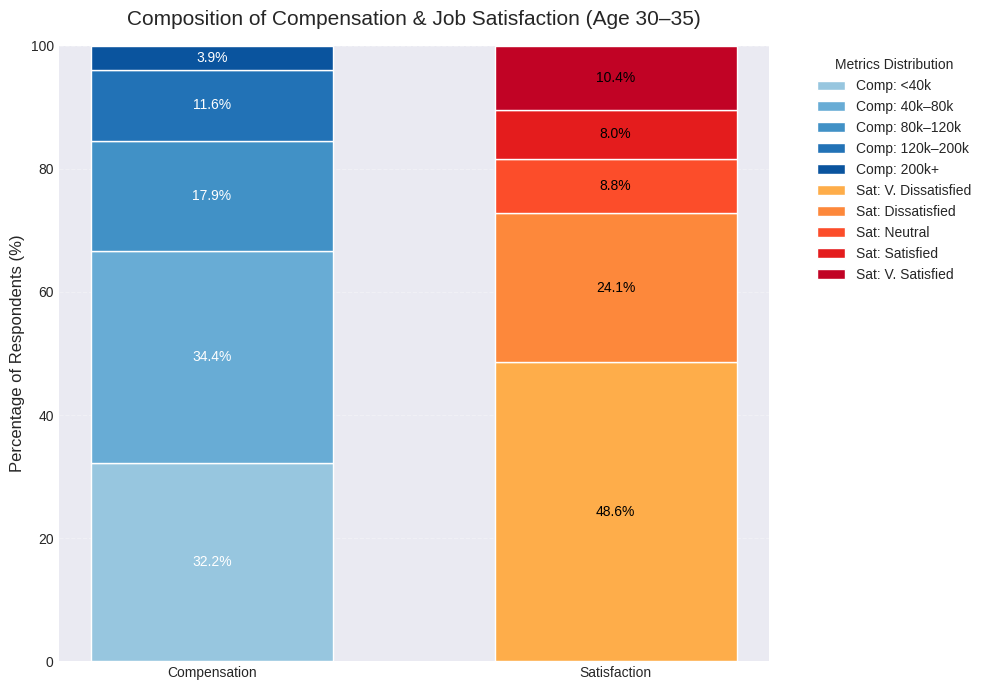

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Filter respondents aged 30–35
age_filter = df[df['Age'].isin(['25-34 years old', '30-34 years old'])]

# 2. Select and convert to numeric
cols = ['ConvertedCompYearly', 'JobSatPoints_6']
age_data = age_filter[cols].copy()
age_data['ConvertedCompYearly'] = pd.to_numeric(age_data['ConvertedCompYearly'], errors='coerce')
age_data['JobSatPoints_6'] = pd.to_numeric(age_data['JobSatPoints_6'], errors='coerce')

# 3. Bins and counts
comp_bins = [0, 40000, 80000, 120000, 200000, float('inf')]
comp_labels = ['<40k', '40k–80k', '80k–120k', '120k–200k', '200k+']
age_data['CompRange'] = pd.cut(age_data['ConvertedCompYearly'], bins=comp_bins, labels=comp_labels)

sat_bins = [0, 20, 40, 60, 80, float('inf')]
sat_labels = ['V. Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'V. Satisfied']
age_data['SatRange'] = pd.cut(age_data['JobSatPoints_6'], bins=sat_bins, labels=sat_labels)

# Normalize to percentages
comp_counts = age_data['CompRange'].value_counts(normalize=True).sort_index() * 100
sat_counts = age_data['SatRange'].value_counts(normalize=True).sort_index() * 100

# 4. Visualization
fig, ax = plt.subplots(figsize=(10, 7))

# Color palettes
colors_comp = plt.cm.Blues(range(100, 256, 30))
colors_sat = plt.cm.YlOrRd(range(100, 256, 30))

# Compensation stack
bottom_comp = 0
for i, (label, pct) in enumerate(comp_counts.items()):
    ax.bar('Compensation', pct, bottom=bottom_comp, color=colors_comp[i],
           edgecolor='white', width=0.6, label=f"Comp: {label}")
    
    # Annotation
    if pct > 0:
        ax.text('Compensation', bottom_comp + pct/2, f"{pct:.1f}%", 
                ha='center', va='center', fontsize=10, color='white')
    
    bottom_comp += pct

# Satisfaction stack
bottom_sat = 0
for i, (label, pct) in enumerate(sat_counts.items()):
    ax.bar('Satisfaction', pct, bottom=bottom_sat, color=colors_sat[i],
           edgecolor='white', width=0.6, label=f"Sat: {label}")
    
    # Annotation
    if pct > 0:
        ax.text('Satisfaction', bottom_sat + pct/2, f"{pct:.1f}%", 
                ha='center', va='center', fontsize=10, color='black')
    
    bottom_sat += pct

# 5. Styling
ax.set_ylabel('Percentage of Respondents (%)', fontsize=12)
ax.set_ylim(0, 100)
ax.set_title('Composition of Compensation & Job Satisfaction (Age 30–35)', fontsize=15, pad=15)
ax.grid(axis='y', linestyle='--', alpha=0.3)

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Metrics Distribution', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.show()


###### *`Overall Insight`*  

When viewed together, the two bars highlight a potential disconnect between compensation and job satisfaction. Even though many respondents fall into moderate salary ranges, satisfaction levels are overwhelmingly low. This may point to factors beyond pay—such as workload, career progression, work‑life balance, or job security—playing a significant role in shaping how individuals aged 30–35 feel about their jobs.

>The chart effectively summarizes the composition of both metrics and provides a foundation for deeper analysis into why dissatisfaction is so prevalent in this demographic.
---
*Interpretation of the Stacked Chart*

The stacked chart provides a side‑by‑side view of how respondents aged 30–35 are distributed across compensation levels and job satisfaction categories. Converting both metrics into percentages allows the two bars to be compared on the same scale, even though the number of respondents answering each question may differ.

*Compensation (Age 30–35)*
The compensation bar shows a workforce concentrated in the lower‑to‑mid salary ranges.  
  
This distribution suggests that most individuals in this age group are still in early‑to‑mid career stages, where compensation tends to cluster in the lower ranges.

*Job Satisfaction (Age 30–35)*
The satisfaction bar reveals a very different pattern.  
- Only a small minority report being **Satisfied** or **Very Satisfied.**

This indicates a strong skew toward negative sentiment among workers in this age group, despite the diversity in compensation levels.

In [39]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # 1. Filter respondents aged 30–35
# age_filter = df[df['Age'].isin(['25-34 years old', '30-34 years old'])]

# # 2. Select and convert to numeric
# cols = ['ConvertedCompYearly', 'JobSatPoints_6']
# age_data = age_filter[cols].copy()
# age_data['ConvertedCompYearly'] = pd.to_numeric(age_data['ConvertedCompYearly'], errors='coerce')
# age_data['JobSatPoints_6'] = pd.to_numeric(age_data['JobSatPoints_6'], errors='coerce')

# # 3. Bins and counts
# comp_bins = [0, 40000, 80000, 120000, 200000, float('inf')]
# comp_labels = ['<40k', '40k–80k', '80k–120k', '120k–200k', '200k+']
# age_data['CompRange'] = pd.cut(age_data['ConvertedCompYearly'], bins=comp_bins, labels=comp_labels)

# sat_bins = [0, 20, 40, 60, 80, float('inf')]
# sat_labels = ['V. Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'V. Satisfied']
# age_data['SatRange'] = pd.cut(age_data['JobSatPoints_6'], bins=sat_bins, labels=sat_labels)

# # Normalize counts to percentages (The "Perfecting" Step)
# comp_counts = age_data['CompRange'].value_counts(normalize=True).sort_index() * 100
# sat_counts = age_data['SatRange'].value_counts(normalize=True).sort_index() * 100

# # 4. Visualization
# fig, ax = plt.subplots(figsize=(10, 7))

# # Plotting with specific colormaps for better distinction
# colors_comp = plt.cm.Blues(range(100, 256, 30))
# colors_sat = plt.cm.YlOrRd(range(100, 256, 30))

# # Compensation stack
# bottom_comp = 0
# for i, (label, count) in enumerate(comp_counts.items()):
#     ax.bar('Compensation', count, bottom=bottom_comp, label=f"Comp: {label}", 
#            color=colors_comp[i], edgecolor='white', width=0.6)
#     bottom_comp += count

# # Satisfaction stack
# bottom_sat = 0
# for i, (label, count) in enumerate(sat_counts.items()):
#     ax.bar('Satisfaction', count, bottom=bottom_sat, label=f"Sat: {label}", 
#            color=colors_sat[i], edgecolor='white', width=0.6)
#     bottom_sat += count

# # 5. Styling
# ax.set_ylabel('Percentage of Respondents (%)', fontsize=12)
# ax.set_ylim(0, 100) # Ensure both bars reach the top
# ax.set_title('Composition of Compensation & Job Satisfaction (Age 30–35)', fontsize=15, pad=15)

# # Move legend and clean up
# ax.legend(title='Metrics Distribution', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
# plt.grid(axis='y', linestyle='--', alpha=0.3)
# plt.tight_layout()

# plt.show()


In [37]:
# # import pandas as pd
# # import matplotlib.pyplot as plt

# # 1. Filter respondents aged 30–35
# age_filter = df[df['Age'].isin(['25-34 years old', '30-34 years old'])]

# # 2. Select and convert to numeric
# cols = ['ConvertedCompYearly', 'JobSatPoints_6']
# age_data = age_filter[cols].copy()
# age_data['ConvertedCompYearly'] = pd.to_numeric(age_data['ConvertedCompYearly'], errors='coerce')
# age_data['JobSatPoints_6'] = pd.to_numeric(age_data['JobSatPoints_6'], errors='coerce')

# # 3. Compensation bins
# comp_bins = [0, 40000, 80000, 120000, 200000, float('inf')]
# comp_labels = ['<40k', '40k–80k', '80k–120k', '120k–200k', '200k+']
# age_data['CompRange'] = pd.cut(age_data['ConvertedCompYearly'], bins=comp_bins, labels=comp_labels)
# comp_counts = age_data['CompRange'].value_counts().sort_index()

# # 4. Satisfaction bins
# sat_bins = [0, 20, 40, 60, 80, float('inf')]
# sat_labels = ['V. Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'V. Satisfied']
# age_data['SatRange'] = pd.cut(age_data['JobSatPoints_6'], bins=sat_bins, labels=sat_labels)
# sat_counts = age_data['SatRange'].value_counts().sort_index()

# # 5. Visualization
# fig, ax = plt.subplots(figsize=(11, 7))

# # Compensation stack
# bottom_comp = 0
# for label, count in comp_counts.items():
#     ax.bar('Compensation', count, bottom=bottom_comp, label=f"Comp: {label}", edgecolor='white')
#     bottom_comp += count

# # Satisfaction stack
# bottom_sat = 0
# for label, count in sat_counts.items():
#     ax.bar('Satisfaction', count, bottom=bottom_sat, label=f"Sat: {label}", edgecolor='white')
#     bottom_sat += count

# # Formatting
# ax.set_ylabel('Number of Respondents', fontsize=12)
# ax.set_title('Composition of Compensation & Job Satisfaction (Age 30–35)', fontsize=15, pad=15)
# ax.grid(axis='y', linestyle='--', alpha=0.3)

# # Improved legend
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles, labels, title='Metrics Distribution', bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.tight_layout()
# plt.show()


In [45]:
# # Step 1: Filter respondents aged 30–35 (based on age group label)
# age_filter = df[df['Age'].isin(['25-34 years old', '30-34 years old'])]

# # Step 2: Select relevant columns
# cols = ['ConvertedCompYearly', 'JobSatPoints_6']
# age_data = age_filter[cols].copy()

# # Step 3: Compute medians
# median_comp = age_data['ConvertedCompYearly'].median()
# median_sat = age_data['JobSatPoints_6'].median()

# ## Option: A
# # -----------------------------
# # Side-by-side charts (one row)
# # -----------------------------
# fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# # Chart 1: Compensation
# axes[0].bar(['Age 30–35'], [median_comp], color='skyblue')
# axes[0].set_title('Median Compensation (Age 30–35)')
# axes[0].set_ylabel('Median Yearly Compensation')

# # Annotation for compensation
# axes[0].text(
#     0, 
#     median_comp, 
#     f'{median_comp:,.0f}', 
#     ha='center', 
#     va='bottom', 
#     fontsize=12
# )

# # Chart 2: Job Satisfaction
# axes[1].bar(['Age 30–35'], [median_sat], color='lightgreen')
# axes[1].set_title('Median Job Satisfaction (Age 30–35)')
# axes[1].set_ylabel('Median JobSatPoints_6')

# # Annotation for satisfaction
# axes[1].text(
#     0, 
#     median_sat, 
#     f'{median_sat:.1f}', 
#     ha='center', 
#     va='bottom', 
#     fontsize=12
# )

# plt.tight_layout()
# plt.show()


# # # Option B Uncomment the following section if you want the charts in a column
# # # commenting out the Option A
# # # -----------------------------
# # # Chart 1: Compensation
# # # -----------------------------
# # plt.figure(figsize=(8, 5))
# # plt.bar(['Age 30–35'], [median_comp], color='skyblue')
# # plt.title('Median Compensation (Age 30–35)')
# # plt.ylabel('Median Yearly Compensation')
# # plt.tight_layout()
# # plt.show()

# # # -----------------------------
# # # Chart 2: Job Satisfaction
# # # -----------------------------
# # plt.figure(figsize=(8, 5))
# # plt.bar(['Age 30–35'], [median_sat], color='lightgreen')
# # plt.title('Median Job Satisfaction (Age 30–35)')
# # plt.ylabel('Median JobSatPoints_6')
# # plt.tight_layout()
# # plt.show()


In [43]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # 1. Ensure AgeNumeric is created (to avoid KeyError)
# age_map = {
#     'Under 18 years old': 15, '18-24 years old': 21, 
#     '25-34 years old': 30, '35-44 years old': 40, 
#     '45-54 years old': 50, '55-64 years old': 60, '65 years or older': 70
# }
# df['AgeNumeric'] = df['Age'].map(age_map)

# # 2. Filter for respondents aged 30-35
# df_3035 = df[(df['AgeNumeric'] >= 30) & (df['AgeNumeric'] <= 40)].copy()

# # 3. Get Medians
# med_comp = df_3035['ConvertedCompYearly'].median()
# med_sat = df_3035['JobSatPoints_6'].median()

# # 4. Plotting
# fig, ax = plt.subplots(figsize=(8, 7))

# # Stack JobSat on top of Compensation
# ax.bar(['Age 30–35'], [med_comp], label='Median Compensation', color='skyblue', width=0.5)
# ax.bar(['Age 30–35'], [med_sat], bottom=[med_comp], label='Median Job Satisfaction', color='salmon', width=0.5)

# # Use Log Scale because of the massive difference in values
# ax.set_yscale('log')

# # 5. Manual Margin Adjustment (Fixes the UserWarning)
# # We set the Y-limit higher so the top label has breathing room
# ax.set_ylim(1, med_comp * 10) 

# # Labels and Styling
# plt.title('Composition of Median Comp & Satisfaction (Age 30–35)', pad=20)
# plt.ylabel('Value (Logarithmic Scale)')
# plt.legend(loc='upper right')

# # Text Labels: Positioned carefully within the log scale
# ax.text(0, med_comp/2, f'${med_comp:,.0f}', ha='center', va='center', fontweight='bold')
# ax.text(0, med_comp * 2, f'Sat: {med_sat}', ha='center', va='bottom', fontweight='bold', color='darkred')

# plt.grid(axis='y', linestyle=':', alpha=0.5)

# # Replace tight_layout() with subplots_adjust to give precise control
# plt.subplots_adjust(top=0.9, bottom=0.1)

# plt.show()


In [47]:
# # Step 1: Filter respondents aged 30–35 (based on age group label)
# age_filter = df[df['Age'].isin(['25-34 years old', '30-34 years old'])]

# # Step 2: Select relevant columns
# cols = ['ConvertedCompYearly', 'JobSatPoints_6']
# age_data = age_filter[cols].copy()

# # Step 3: Compute medians
# median_comp = age_data['ConvertedCompYearly'].median()
# median_sat = age_data['JobSatPoints_6'].median()

# # -----------------------------
# # Dual-axis bar chart (clean)
# # -----------------------------
# fig, ax1 = plt.subplots(figsize=(10, 6))

# # X positions for the two bars
# x1 = 0       # compensation bar
# x2 = 0.4     # satisfaction bar (shifted right)

# # Bar 1: Compensation (left axis)
# ax1.bar(x1, median_comp, width=0.35, color='steelblue')
# ax1.set_ylabel('Yearly Compensation (USD)', color='steelblue')
# ax1.tick_params(axis='y', labelcolor='steelblue')

# # Annotation for compensation
# ax1.text(
#     x1, median_comp, f'{median_comp:,.0f}',
#     ha='center', va='bottom', fontsize=12, color='steelblue'
# )

# # Create second axis
# ax2 = ax1.twinx()

# # Bar 2: Job Satisfaction (right axis)
# ax2.bar(x2, median_sat, width=0.35, color='orange')
# ax2.set_ylabel('Job Satisfaction Score (0–6)', color='orange')
# ax2.tick_params(axis='y', labelcolor='orange')

# # Annotation for satisfaction
# ax2.text(
#     x2, median_sat, f'{median_sat:.1f}',
#     ha='center', va='bottom', fontsize=12, color='orange'
# )

# # X-axis labels
# plt.xticks([x1, x2], ['Compensation', 'Satisfaction'])

# plt.title('Composition of Compensation & Satisfaction for Age 30–35')
# plt.tight_layout()
# plt.show()


In [24]:
# print(df['JobSatPoints_6'].value_counts(dropna=False))
# print(df['JobSatPoints_7'].value_counts(dropna=False))


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


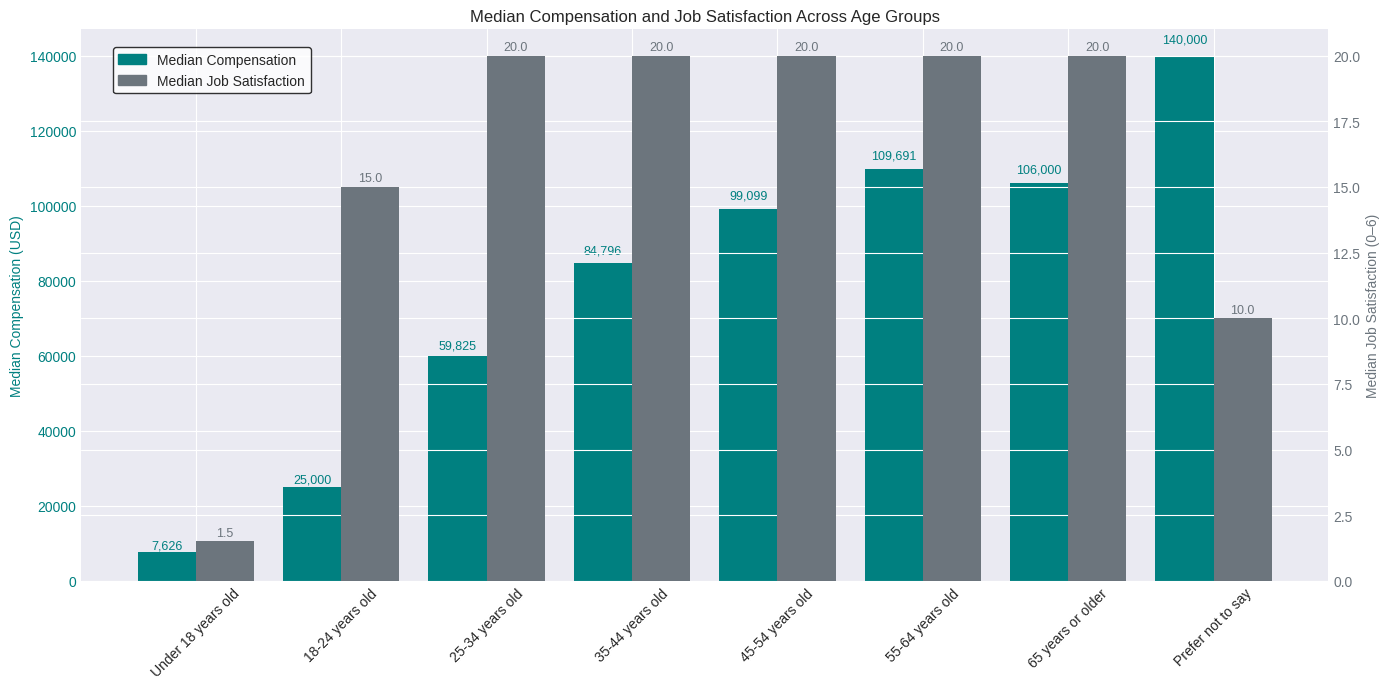

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Select relevant columns
cols = ['Age', 'ConvertedCompYearly', 'JobSatPoints_6']
df_med = df[cols].copy()

# Step 2: Clean numeric fields
df_med['ConvertedCompYearly'] = pd.to_numeric(df_med['ConvertedCompYearly'], errors='coerce')
df_med['JobSatPoints_6'] = pd.to_numeric(df_med['JobSatPoints_6'], errors='coerce')

# Step 3: Define age order
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

df_med['Age'] = pd.Categorical(df_med['Age'], categories=age_order, ordered=True)

# Step 4: Compute medians
medians = df_med.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].median()

# Step 5: Plot dual-axis chart
fig, ax1 = plt.subplots(figsize=(14, 7))

x = range(len(medians))
width = 0.4

# Left axis → Compensation
ax1.bar(
    [i - width/2 for i in x],
    medians['ConvertedCompYearly'],
    width=width,
    color='#008080',
    label='Median Compensation'
)

ax1.set_ylabel('Median Compensation (USD)', color='#008080')
ax1.tick_params(axis='y', labelcolor='#008080')

# Right axis → Satisfaction
ax2 = ax1.twinx()

ax2.bar(
    [i + width/2 for i in x],
    medians['JobSatPoints_6'],
    width=width,
    color='#6c757d',
    label='Median Job Satisfaction'
)

ax2.set_ylabel('Median Job Satisfaction (0–6)', color='#6c757d')
ax2.tick_params(axis='y', labelcolor='#6c757d')

# --- FIXED ROTATION (this is the correct method) ---
ax1.set_xticks(list(x))
ax1.set_xticklabels(medians.index, rotation=45)

# Title
plt.title('Median Compensation and Job Satisfaction Across Age Groups')

# --- ANNOTATIONS ---
for i, age in enumerate(medians.index):
    comp_val = medians.loc[age, 'ConvertedCompYearly']
    sat_val = medians.loc[age, 'JobSatPoints_6']

    ax1.text(
        i - width/2,
        comp_val + (comp_val * 0.02),
        f"{int(comp_val):,}",
        ha='center',
        va='bottom',
        fontsize=9,
        color='#008080'
    )

    ax2.text(
        i + width/2,
        sat_val + 0.1,
        f"{sat_val:.1f}",
        ha='center',
        va='bottom',
        fontsize=9,
        color='#6c757d'
    )

# --- LEGEND INSIDE ---
comp_patch = plt.Rectangle((0,0),1,1, color='#008080')
sat_patch = plt.Rectangle((0,0),1,1, color='#6c757d')

plt.legend(
    handles=[comp_patch, sat_patch],
    labels=['Median Compensation', 'Median Job Satisfaction'],
    loc='upper left',
    bbox_to_anchor=(0.02, 0.98),
    frameon=True,
    facecolor='white',
    edgecolor='black'
)

plt.tight_layout()
plt.show()


#### `Summary of Results`

Median compensation increases steadily with age, reflecting the typical rise in earnings as individuals gain experience and seniority. The highest compensation appears in the “Prefer not to say” group, likely influenced by a small number of high‑earning respondents. In contrast, median job satisfaction rises quickly in early adulthood and remains consistently high across most mid‑career and late‑career age groups. Satisfaction is lowest among the youngest respondents and dips again in the “Prefer not to say” category. Overall, compensation and satisfaction follow different patterns: earnings continue to grow with age, while satisfaction stabilizes much earlier, suggesting that long‑term job fulfillment depends on more than income alone.

<Figure size 1200x600 with 0 Axes>

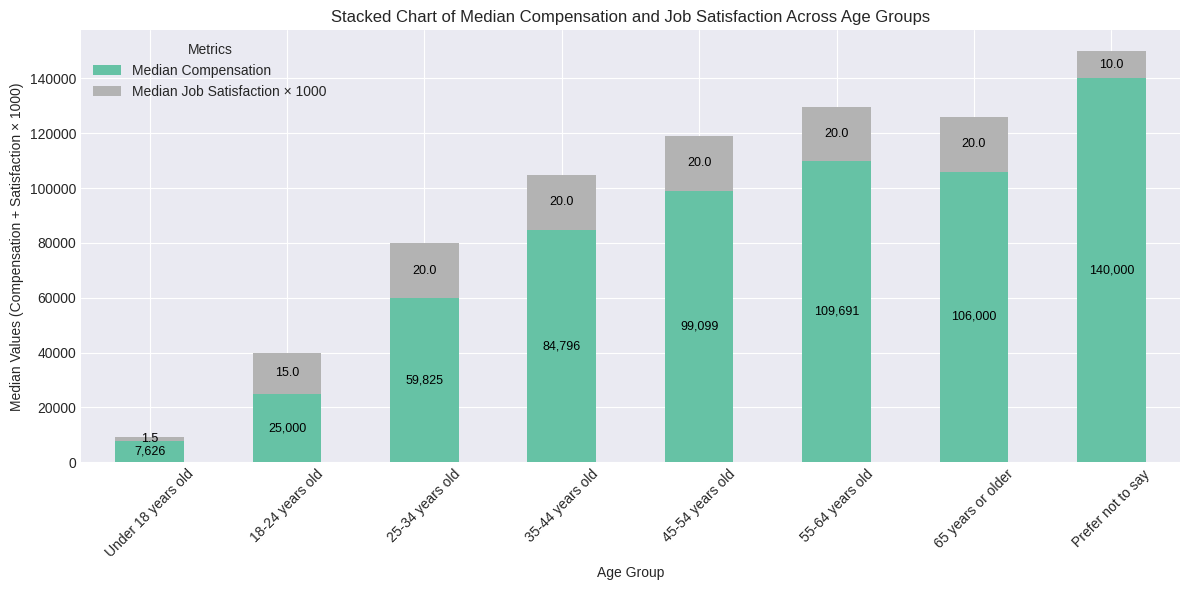

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Select relevant columns
cols = ['Age', 'ConvertedCompYearly', 'JobSatPoints_6']
df_med = df[cols].copy()

# Step 2: Clean numeric fields
df_med['ConvertedCompYearly'] = pd.to_numeric(df_med['ConvertedCompYearly'], errors='coerce')
df_med['JobSatPoints_6'] = pd.to_numeric(df_med['JobSatPoints_6'], errors='coerce')

# Step 3: Define age order
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

df_med['Age'] = pd.Categorical(df_med['Age'], categories=age_order, ordered=True)

# Step 4: Scale satisfaction so it becomes visible
scale_factor = 1000
df_med['SatScaled'] = df_med['JobSatPoints_6'] * scale_factor

# Step 5: Compute medians
medians = df_med.groupby('Age')[['ConvertedCompYearly', 'SatScaled']].median()
true_medians = df_med.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].median()

# Step 6: Plot stacked chart
plt.figure(figsize=(12, 6))
ax = medians.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='Set2'
)

plt.title('Stacked Chart of Median Compensation and Job Satisfaction Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel(f'Median Values (Compensation + Satisfaction × {scale_factor})')

# Updated legend with scale information
plt.legend(
    ['Median Compensation', f'Median Job Satisfaction × {scale_factor}'],
    title='Metrics'
)

# Step 7: Add annotations (true values, not scaled)
for i, age in enumerate(medians.index):
    comp_val = true_medians.loc[age, 'ConvertedCompYearly']
    sat_val = true_medians.loc[age, 'JobSatPoints_6']
    scaled_sat = medians.loc[age, 'SatScaled']
    
    # Compensation annotation
    ax.text(i, comp_val / 2, f"{int(comp_val):,}", ha='center', va='center', fontsize=9, color='black')
    
    # Satisfaction annotation (placed in the middle of the scaled segment)
    ax.text(i, comp_val + scaled_sat / 2, f"{sat_val:.1f}", ha='center', va='center', fontsize=9, color='black')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [50]:
# print(df['ConvertedCompYearly'].value_counts(dropna=False))
# print(df['JobSatPoints_6'].value_counts(dropna=False))
# print(df['Age'].value_counts(dropna=False))

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


<Figure size 1400x700 with 0 Axes>

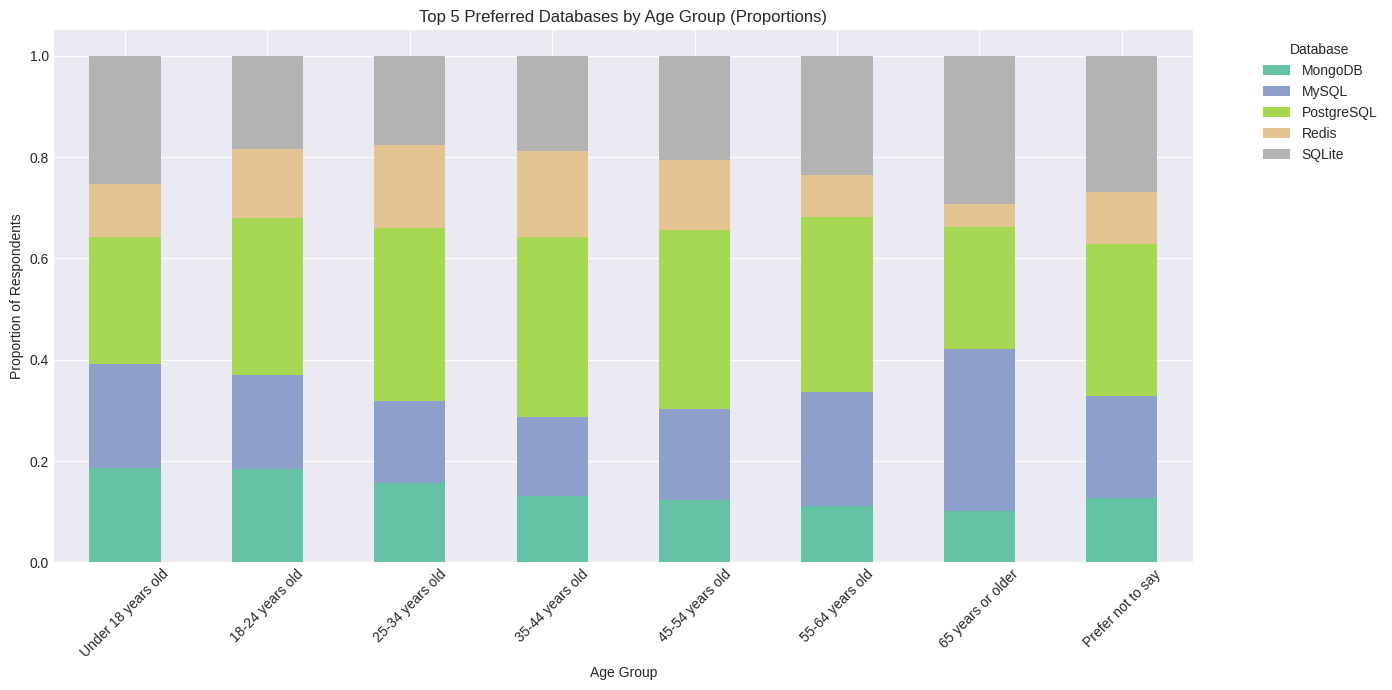

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Select relevant columns
cols = ['Age', 'DatabaseWantToWorkWith']
df_db = df[cols].dropna()

# Step 2: Define age order
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

df_db['Age'] = pd.Categorical(df_db['Age'], categories=age_order, ordered=True)

# Step 3: Split multiple selections (semicolon-separated)
df_db = df_db.assign(DatabaseWantToWorkWith=df_db['DatabaseWantToWorkWith'].str.split(';'))
df_db = df_db.explode('DatabaseWantToWorkWith')

# Step 4: Identify top 5 databases overall
top5 = df_db['DatabaseWantToWorkWith'].value_counts().head(5).index

# Step 5: Filter dataset to top 5 only
df_top = df_db[df_db['DatabaseWantToWorkWith'].isin(top5)]

# Step 6: Count database preferences by age group
db_counts = df_top.groupby(['Age', 'DatabaseWantToWorkWith']).size().unstack(fill_value=0)

# Step 7: Convert counts to proportions
db_props = db_counts.div(db_counts.sum(axis=1), axis=0)

# Step 8: Plot stacked chart
plt.figure(figsize=(14, 7))

db_props.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    colormap='Set2'
)

plt.title('Top 5 Preferred Databases by Age Group (Proportions)')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


<Figure size 1400x700 with 0 Axes>

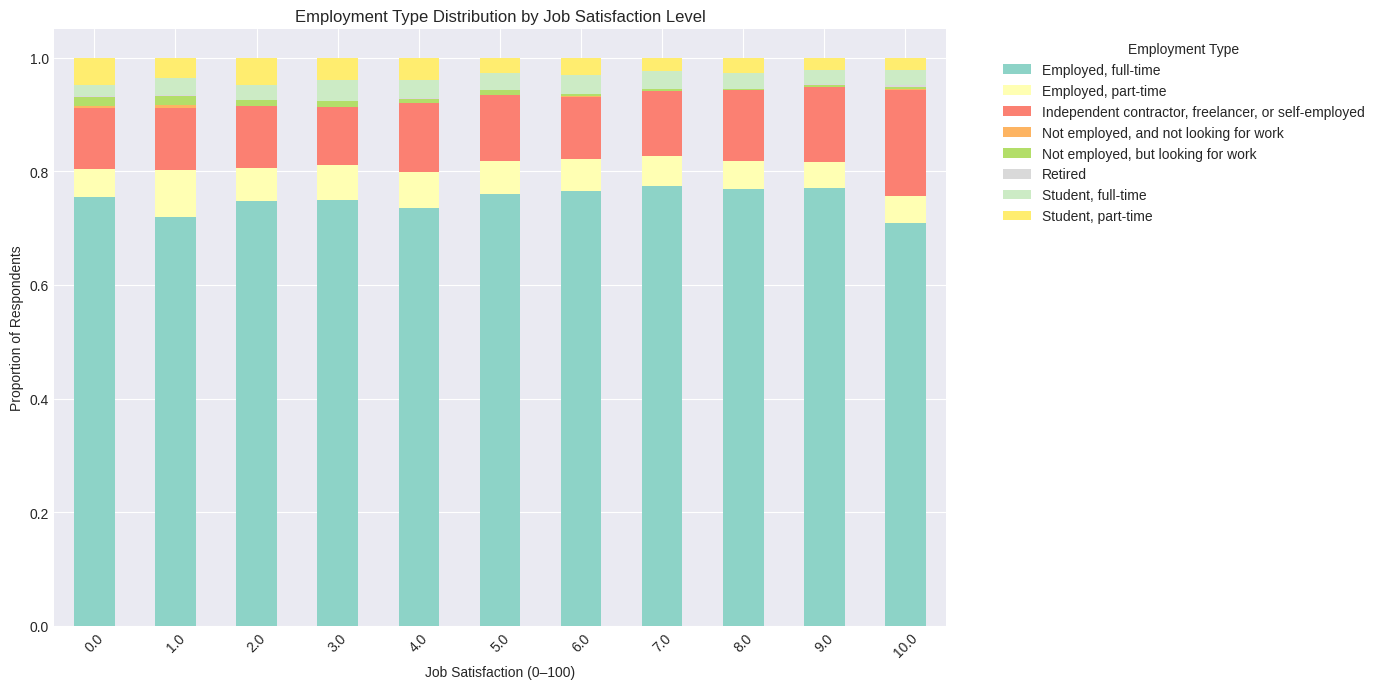

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Select relevant columns
cols = ['Employment', 'JobSat']
df_emp = df[cols].dropna()

# Step 2: Clean Job Satisfaction column (convert to numeric if needed)
df_emp['JobSat'] = pd.to_numeric(df_emp['JobSat'], errors='coerce')
df_emp = df_emp.dropna(subset=['JobSat'])

# Step 3: Define satisfaction order (0–100 scale)
sat_order = sorted(df_emp['JobSat'].unique())
df_emp['JobSat'] = pd.Categorical(df_emp['JobSat'], categories=sat_order, ordered=True)

# Step 4: Split multiple employment types (semicolon-separated)
df_emp = df_emp.assign(Employment=df_emp['Employment'].str.split(';'))
df_emp = df_emp.explode('Employment')

# Step 5: Count employment types by satisfaction level
emp_counts = df_emp.groupby(['JobSat', 'Employment']).size().unstack(fill_value=0)

# Step 6: Convert counts to proportions
emp_props = emp_counts.div(emp_counts.sum(axis=1), axis=0)

# Step 7: Plot stacked chart
plt.figure(figsize=(14, 7))

emp_props.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    colormap='Set3'
)

plt.title('Employment Type Distribution by Job Satisfaction Level')
plt.xlabel('Job Satisfaction (0–100)')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


<Figure size 1400x700 with 0 Axes>

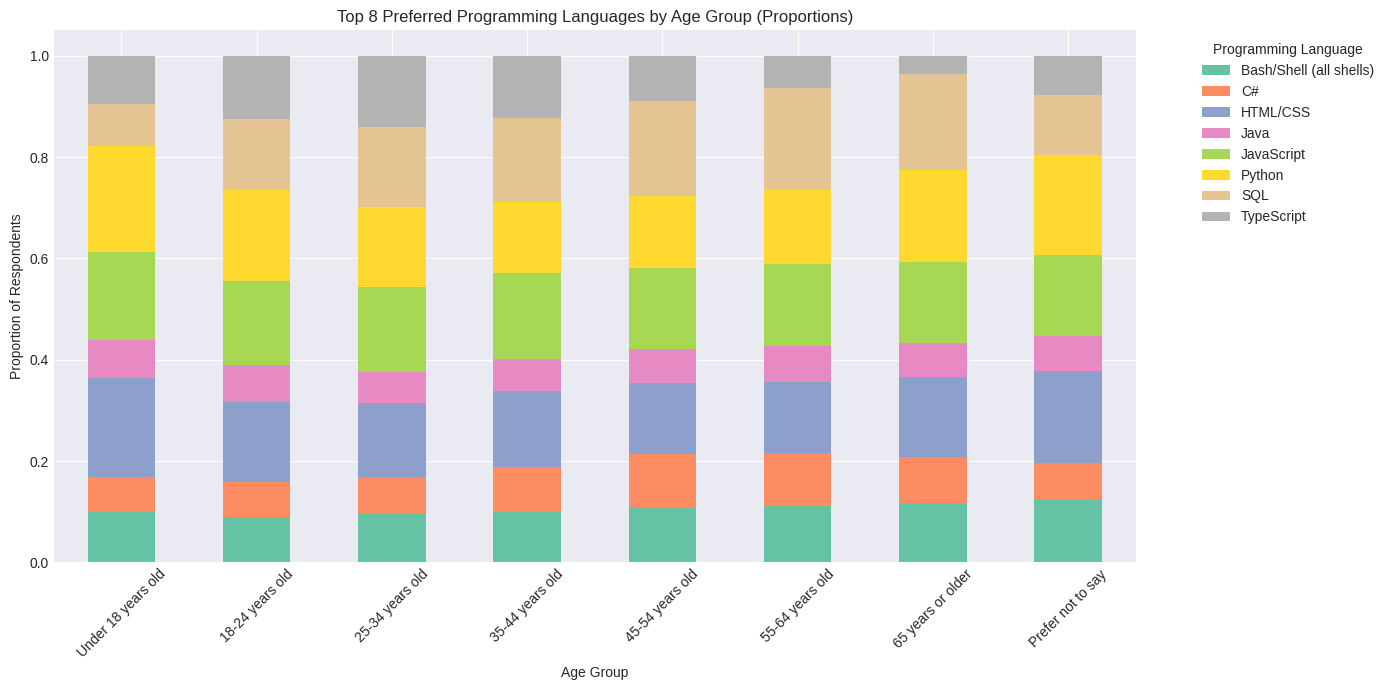

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Select relevant columns
cols = ['Age', 'LanguageAdmired']
df_lang = df[cols].dropna()

# Step 2: Define age order
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

df_lang['Age'] = pd.Categorical(df_lang['Age'], categories=age_order, ordered=True)

# Step 3: Split multiple selections (semicolon-separated)
df_lang = df_lang.assign(LanguageAdmired=df_lang['LanguageAdmired'].str.split(';'))
df_lang = df_lang.explode('LanguageAdmired')

# Step 4: Identify top 8 languages overall
top8 = df_lang['LanguageAdmired'].value_counts().head(8).index

# Step 5: Filter dataset to top 8 only
df_top = df_lang[df_lang['LanguageAdmired'].isin(top8)]

# Step 6: Count language preferences by age group
lang_counts = df_top.groupby(['Age', 'LanguageAdmired']).size().unstack(fill_value=0)

# Step 7: Convert counts to proportions
lang_props = lang_counts.div(lang_counts.sum(axis=1), axis=0)

# Step 8: Plot stacked chart
plt.figure(figsize=(14, 7))

lang_props.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    colormap='Set2'
)

plt.title('Top 8 Preferred Programming Languages by Age Group (Proportions)')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Programming Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


<Figure size 1400x800 with 0 Axes>

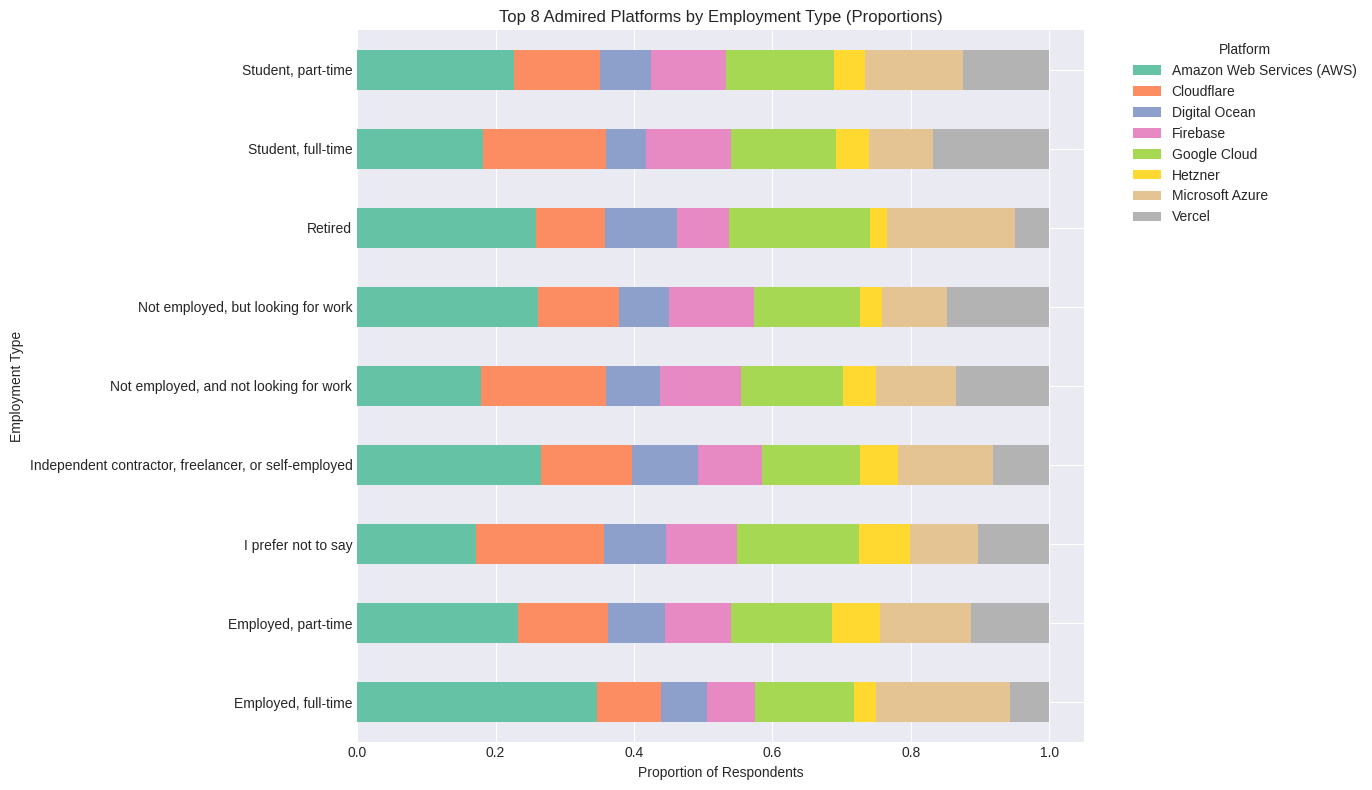

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Select relevant columns
cols = ['Employment', 'PlatformAdmired']
df_plat = df[cols].dropna()

# Clean Employment (fixes messy combinations)
df_plat = df_plat.assign(Employment=df_plat['Employment'].str.split(';'))
df_plat = df_plat.explode('Employment')
df_plat['Employment'] = df_plat['Employment'].str.strip()
df_plat = df_plat[df_plat['Employment'] != '']

# Step 2: Split multiple admired platforms
df_plat = df_plat.assign(PlatformAdmired=df_plat['PlatformAdmired'].str.split(';'))
df_plat = df_plat.explode('PlatformAdmired')
df_plat['PlatformAdmired'] = df_plat['PlatformAdmired'].str.strip()

# Step 3: Identify top 8 admired platforms
top8 = df_plat['PlatformAdmired'].value_counts().head(8).index

# Step 4: Filter dataset to top 8 only
df_top = df_plat[df_plat['PlatformAdmired'].isin(top8)]

# Step 5: Count platform admiration by employment type
plat_counts = df_top.groupby(['Employment', 'PlatformAdmired']).size().unstack(fill_value=0)

# Step 6: Convert counts to proportions
plat_props = plat_counts.div(plat_counts.sum(axis=1), axis=0)

# Step 7: Plot horizontal stacked chart
plt.figure(figsize=(14, 8))

plat_props.plot(
    kind='barh',
    stacked=True,
    figsize=(14, 8),
    colormap='Set2'
)

plt.title('Top 8 Admired Platforms by Employment Type (Proportions)')
plt.xlabel('Proportion of Respondents')
plt.ylabel('Employment Type')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
